<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Clean Data

### Initializations

Es werden die benötigten Bibliotheken eingebunden und für Variationsmöglichkeiten bei der Ausgabe wird class color definiert.

Die Test- und Trainingsdaten werden eingelesen und überprüft.

In [1]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Einlesen der Test- und Trainingsdaten
df = pd.read_pickle('exchange/hr_01_loaded_train.pkl')
df_test = pd.read_pickle('exchange/hr_01_loaded_test.pkl')

In [4]:
# Eingelesene Daten überprüfen
print(color.BOLD + 'Info about HR Training Dataframe' + color.END)
print(df.info())
print()
print(color.BOLD + 'Info about HR Test Dataframe' + color.END)
print(df_test.info())

Info about HR Training Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
satisfactionLevel       10000 non-null float64
yearsSinceEvaluation    10000 non-null float64
numberOfProjects        10000 non-null int64
averageMonthlyHours     10000 non-null int64
yearsAtCompany          10000 non-null int64
workAccident            10000 non-null category
hasLeftCompany          10000 non-null category
gotPromotion            10000 non-null category
department              10000 non-null category
salary                  10000 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 439.7 KB
None

Info about HR Test Dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 10 columns):
id                      4999 non-null int64
satisfactionLevel       4999 non-null float64
yearsSinceEvaluation    4999 non-null float64
numberOfProjects        4999 non-null int64
ave

### Check Data

Überprüfung der Vermutung, dass der Datensatz keine leeren Zellen enthält.

In den folgenden Schritten werden die Spalten mit numerischen Werten und die Spalten mit dem Typ Category getrennt analysiert. Bei den numerischen Spalten, werden die statistischen Standardwerte ausgegeben und visualisiert.

In [5]:
# Überprüfung auf Null-Werte
df.isnull().any()

satisfactionLevel       False
yearsSinceEvaluation    False
numberOfProjects        False
averageMonthlyHours     False
yearsAtCompany          False
workAccident            False
hasLeftCompany          False
gotPromotion            False
department              False
salary                  False
dtype: bool

In [6]:
# Überprüfung der Spalten mit Zahlenwerten auf Plausibilität
df.describe(include=[np.number])

,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.611204,0.717084,3.800700,200.688200,3.483200
std,0.248888,0.171446,1.234719,50.060579,1.448768
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,199.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


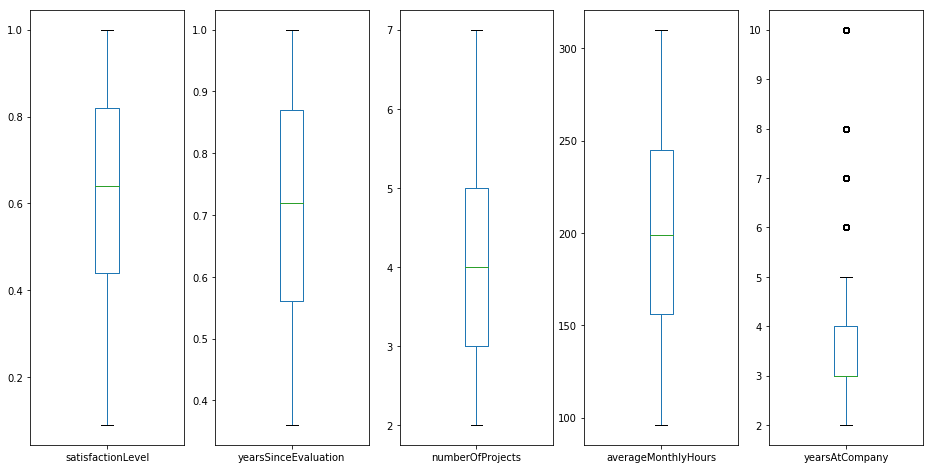

In [7]:
# Visualisierung der Spalten mit Zahlenwerten
count_number_colums = df.select_dtypes(include=[np.number]).columns.size
f, axes = plt.subplots(1, count_number_colums, figsize=(16,8))
for idx, col in enumerate(df.select_dtypes(include=[np.number])):
    df[col].plot.box(ax=axes[idx])
    

In [8]:
# Überprüfung der Spalten mit Kategorien auf Plausibilität
df.describe(include=['category'])

,workAccident,hasLeftCompany,gotPromotion,department,salary
count,10000,10000,10000,10000,10000
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,8563,7615,9804,2763,4912


### Export Dataframe for Next Steps
Es mussten keine Daten bereinigt werden, da die Daten keine leeren Zellen oder sonstigen ungewünschten Ausprägungen enthalten.

Als letzter Schritt werden die Daten nun noch exportiert.

In [9]:
df.to_pickle('exchange/hr_01_cleaned_train.pkl')
df_test.to_pickle('exchange/hr_01_cleaned_test.pkl')